### Plotting a 3D plot of fMRI results, first image of run 1

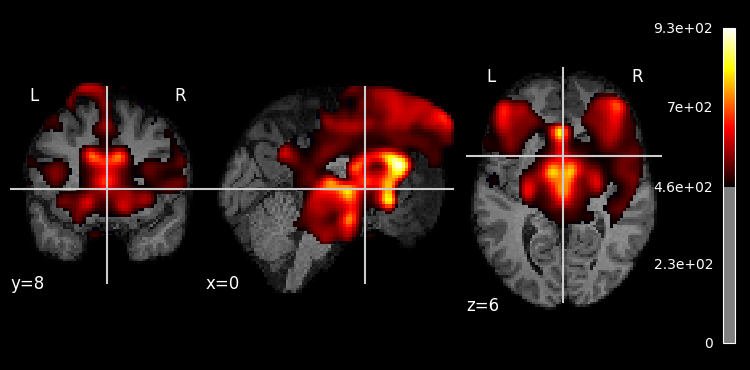

In [1]:
from nilearn import plotting, image
import os
os.chdir('/Users/jennifer/Single-Subject-Working-Memory-Analysis/')

plotting.plot_stat_map(image.load_img('func/run01/srraf2018-08-05_10-17-104147-00001-00001-1.nii'),
                       bg_img='anat/wc0cs2018-08-05_10-17-102019-00001-00160-1.nii', threshold= 460)

In [2]:
run01_img = image.load_img('func/run01/*.nii')
first_run = image.index_img(run01_img, 0)
print(first_run.shape)

(86, 86, 54)


### Plotting the 4D image of multiple time points

In [ ]:
for img in image.iter_img(run01_img):
    plotting.plot_stat_map(
        img, threshold=460, 
        bg_img = 'anat/wc0cs2018-08-05_10-17-102019-00001-00160-1.nii',
          display_mode="z", cut_coords=1, colorbar=False
    )

#### Computing the mean of images over time

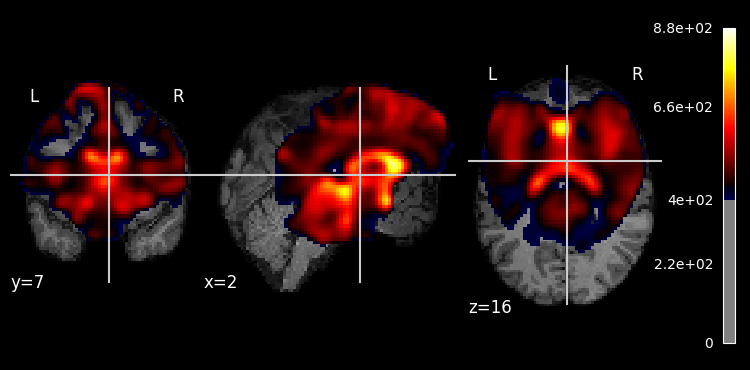

In [3]:
mean_over_time = image.mean_img(run01_img)
plotting.plot_stat_map(mean_over_time, threshold = 400,
            bg_img='anat/wc0cs2018-08-05_10-17-102019-00001-00160-1.nii')

### Single-subject data in native space
#### Display the mean functional image and the subject’s anatomy

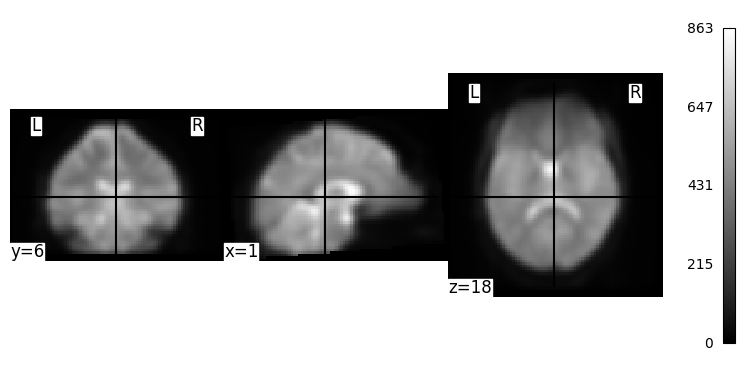

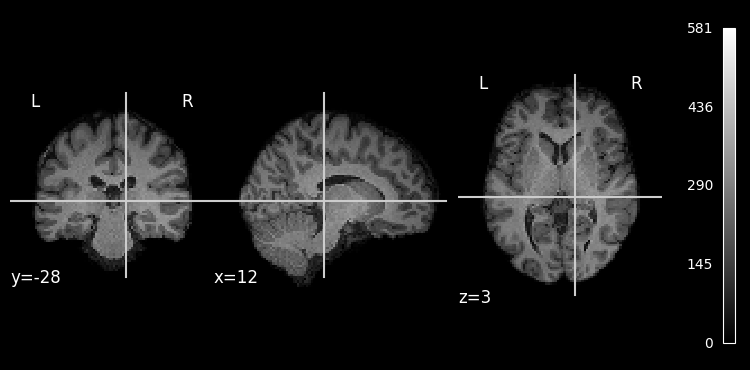

In [4]:
from nilearn.image import mean_img
from nilearn.plotting import plot_anat, plot_img, plot_stat_map, show

mean_img = mean_img('func/run01/srraf2018-08-05_10-17-104147-00001-00001-1.nii')
plot_img(mean_img, colorbar=True, cbar_tick_format="%i", cmap="gray")

plot_anat('anat/wc0cs2018-08-05_10-17-102019-00001-00160-1.nii',
        colorbar=True, cbar_tick_format="%i")

show()

#### Specifying the experimental paradigm

In [5]:
import pandas as pd

events = pd.read_table('func/run01/events.tsv')
events.head(10)

,onset,duration,block,counterbalance,ChosenProbeColor,CorrectProbeColor,CurrentTask,LastITI,ProbeLoc,ProbeMatch,...,probeACC,probeStart,probert,response,runStart,scannerStart,stimFlip,stimStart,subject,trialStart
0,6.0,3.5,1,1,5,141,1,6.0,7,1,...,1,1634146.0,0.774408,1,1634145.0,1634139.0,1634145.0,1634145.0,103,1634145.0
1,10.5,3.5,1,1,2,121,1,6.0,5,1,...,1,1634151.0,0.880411,1,1634145.0,1634139.0,1634149.0,1634149.0,103,1634149.0
2,15.0,3.5,1,1,9,21,1,6.0,5,2,...,1,1634155.0,0.959108,2,1634145.0,1634139.0,1634154.0,1634154.0,103,1634153.0
3,19.5,3.5,1,1,1,21,1,6.0,2,1,...,1,1634160.0,0.863326,1,1634145.0,1634139.0,1634158.0,1634158.0,103,1634157.0
4,24.0,3.5,1,1,5,41,1,6.0,5,1,...,1,1634164.0,1.645432,1,1634145.0,1634139.0,1634163.0,1634163.0,103,1634162.0
5,28.5,3.5,1,1,2,1,1,6.0,9,2,...,1,1634169.0,0.796284,2,1634145.0,1634139.0,1634167.0,1634167.0,103,1634166.0
6,33.5,3.5,1,1,3,141,1,6.0,6,2,...,1,1634174.0,0.831825,2,1634145.0,1634139.0,1634172.0,1634172.0,103,1634171.0
7,38.5,3.5,1,1,1,81,1,6.0,9,1,...,1,1634179.0,0.615353,1,1634145.0,1634139.0,1634177.0,1634177.0,103,1634176.0
8,44.5,3.5,1,1,1,61,1,6.0,3,1,...,1,1634185.0,1.565718,1,1634145.0,1634139.0,1634183.0,1634183.0,103,1634181.0
9,50.0,3.5,1,1,3,21,1,6.0,5,1,...,1,1634190.0,0.630607,1,1634145.0,1634139.0,1634189.0,1634189.0,103,1634187.0


#### GLM analysis

In [6]:
from nilearn.glm.first_level import FirstLevelModel

fmri_glm = FirstLevelModel(
    t_r=2,
    noise_model="ar1",
    standardize=False,
    hrf_model="spm",
    drift_model="cosine",
)

fmri_glm = fmri_glm.fit(run01_img, events)

/Users/jennifer/anaconda3/envs/cse156/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:129: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(
/Users/jennifer/anaconda3/envs/cse156/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: block, msecProbeRT, probert, CurrentTask, SeqStartTime, stimFlip, ProbeLoc, ThisITI, SetSize, ProbeType, subject, scannerStart, ProbeMatch, LastITI, runStart, error, ChosenProbeColor, probeACC, correctResp, trialStart, centralJitter, probeStart, chooseSequence, response, counterbalance, CorrectProbeColor, stimStart
  warnings.warn(


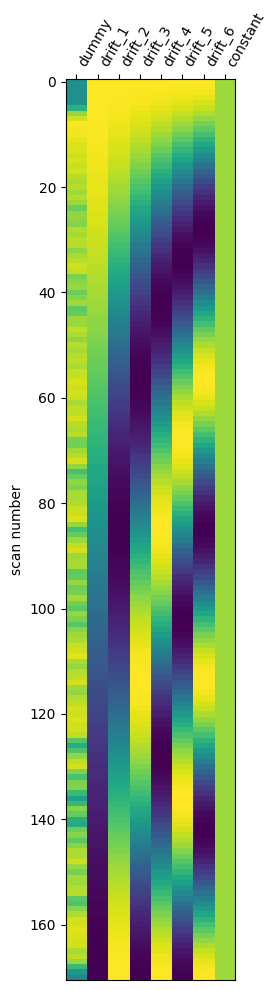

In [7]:
design_matrix = fmri_glm.design_matrices_[0]
from nilearn.plotting import plot_design_matrix

plot_design_matrix(design_matrix)

show()

In [8]:
from pathlib import Path

output_dir = Path.cwd() / "results" / "plot_single_subject_single_run"
output_dir.mkdir(exist_ok=True, parents=True)
print(f"Output will be saved to: {output_dir}")

plot_design_matrix(design_matrix, output_file=output_dir / "design_matrix.png")

Output will be saved to: /Users/jennifer/Single-Subject-Working-Memory-Analysis/results/plot_single_subject_single_run


#### Plot first column

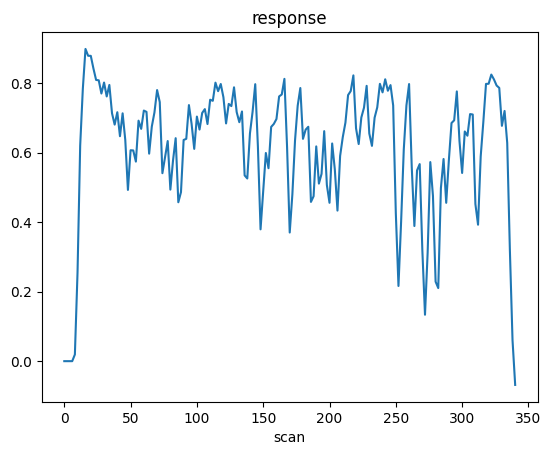

In [9]:
import matplotlib.pyplot as plt

plt.plot(design_matrix["dummy"])
plt.xlabel("scan")
plt.title("response")

show()

#### Detecting voxels with significant effects

<Axes: label='conditions'>

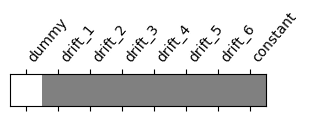

In [10]:
import numpy as np

n_regressors = design_matrix.shape[1]
activation = np.zeros(n_regressors)
activation[0] = 1

from nilearn.plotting import plot_contrast_matrix

plot_contrast_matrix(contrast_def=activation, design_matrix=design_matrix)

##### Compute estimated effect

In [11]:
eff_map = fmri_glm.compute_contrast(activation, output_type="effect_size")
# t-statistic to z-scale 
z_map = fmri_glm.compute_contrast(activation, output_type="z_score")

#### No threshold

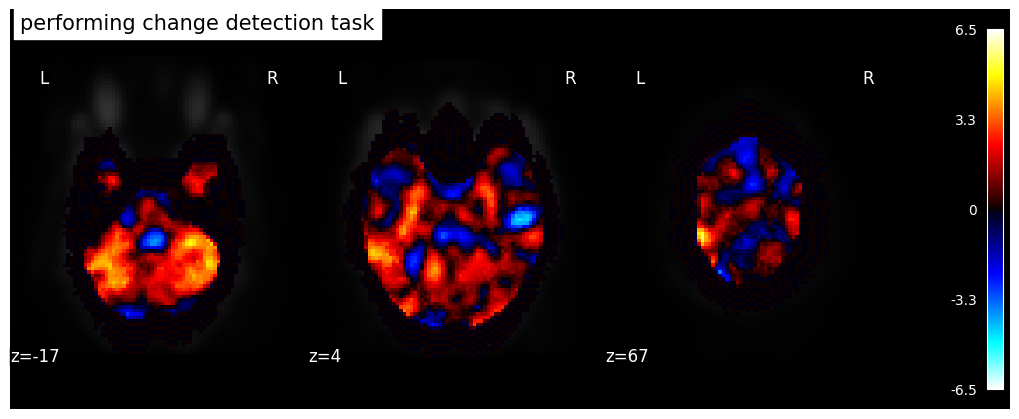

In [12]:
plotting_config = {
    "bg_img": mean_img,
    "display_mode": "z",
    "cut_coords": 3,
    "black_bg": True,
}
plot_stat_map(
    z_map,
    title="performing change detection task",
    figure=plt.figure(figsize=(10, 4)),
    **plotting_config,
)
show()

##### Set arbitrary threshold

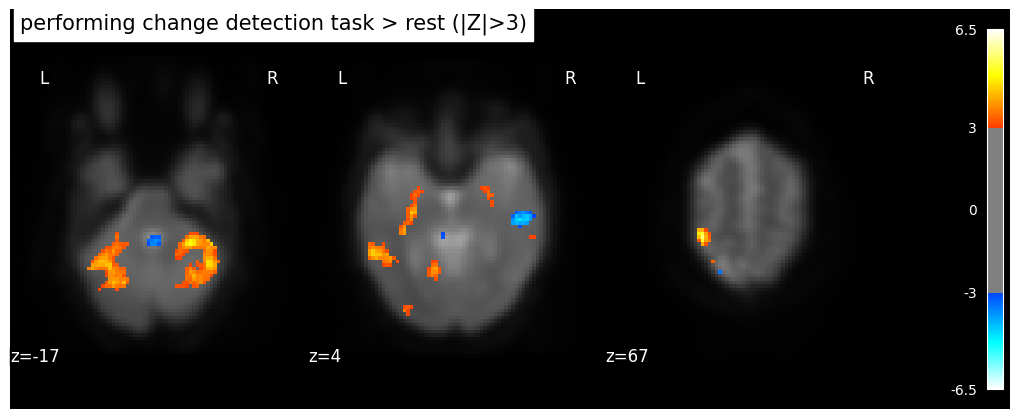

In [13]:
plotting_config = {
    "bg_img": mean_img,
    "display_mode": "z",
    "cut_coords": 3,
    "black_bg": True,
}
plot_stat_map(
    z_map,
    threshold=3,
    title="performing change detection task > rest (|Z|>3)",
    figure=plt.figure(figsize=(10, 4)),
    **plotting_config,
)
show()

#### Control False Positive rate at a certain level
e.g. 0.001: this means that there is 0.1% chance of declaring an inactive voxel, active

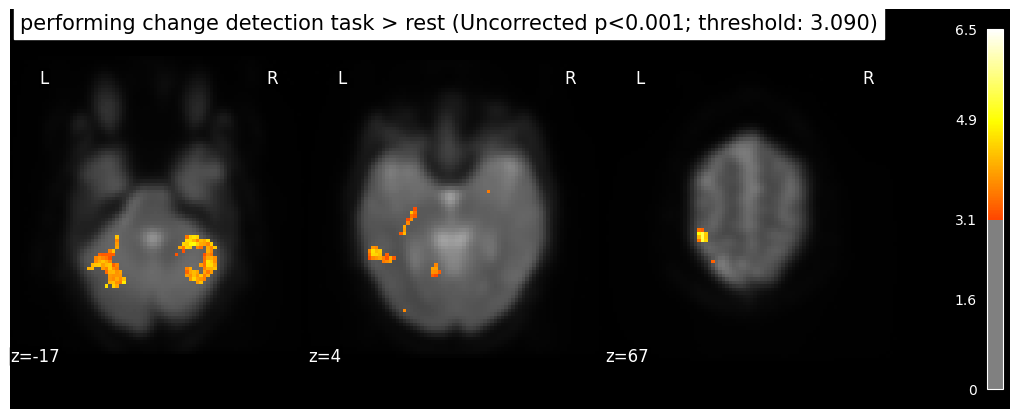

In [14]:
from nilearn.glm import threshold_stats_img

clean_map, threshold = threshold_stats_img(
    z_map,
    alpha=0.001,
    height_control="fpr", # false positive rate
    two_sided=False,  # using a one-sided test
)
# Let's use a sequential colormap as we will only display positive values.
plotting_config["cmap"] = "black_red"
plot_stat_map(
    clean_map,
    threshold=threshold,
    title=(
        "performing change detection task > rest (Uncorrected p<0.001; "
        f"threshold: {threshold:.3f})"
    ),
    figure=plt.figure(figsize=(10, 4)),
    **plotting_config,
)
show()

##### Super conservative solution: use bonferroni correction

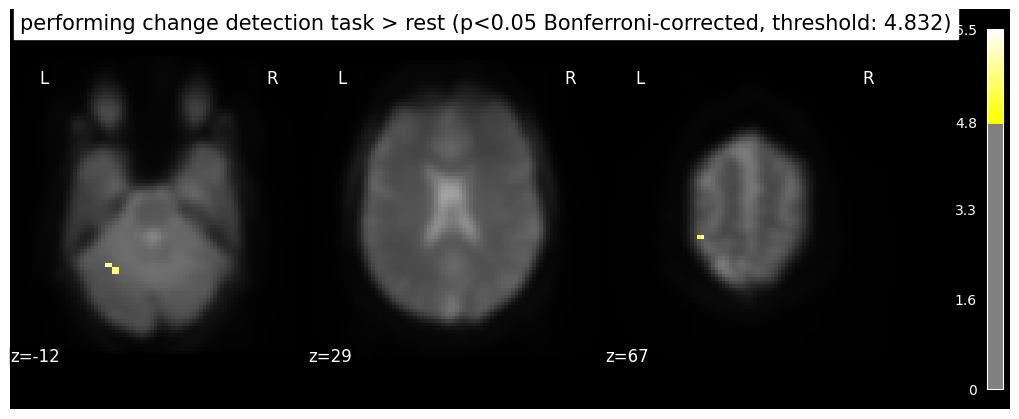

In [15]:
clean_map, threshold = threshold_stats_img(
    z_map, alpha=0.05, height_control="bonferroni", two_sided=False
)
plot_stat_map(
    clean_map,
    threshold=threshold,
    title=(
        "performing change detection task > rest (p<0.05 Bonferroni-corrected, "
        f"threshold: {threshold:.3f})"
    ),
    figure=plt.figure(figsize=(10, 4)),
    **plotting_config,
)
show()

##### Control False discovery rate

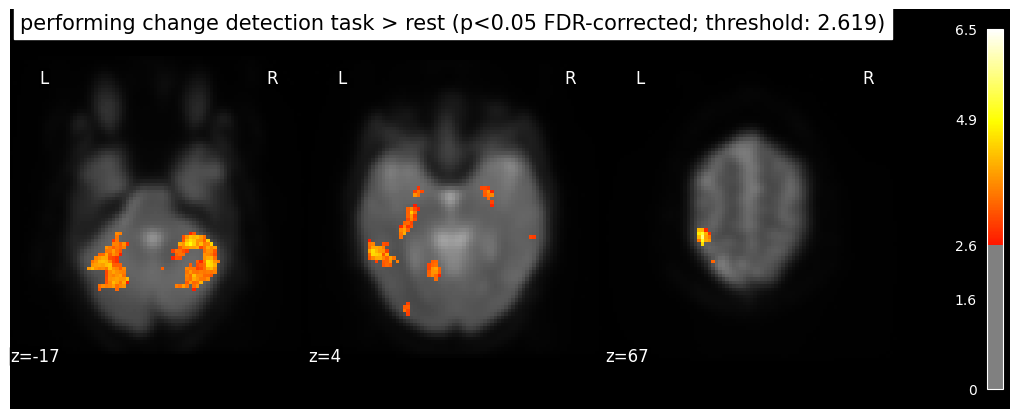

In [16]:
clean_map, threshold = threshold_stats_img(
    z_map, alpha=0.05, height_control="fdr", two_sided=False
)
plot_stat_map(
    clean_map,
    threshold=threshold,
    title=(
        "performing change detection task > rest (p<0.05 FDR-corrected; "
        f"threshold: {threshold:.3f})"
    ),
    figure=plt.figure(figsize=(10, 4)),
    **plotting_config,
)
show()

##### Remove small clusters (isolated voxels)

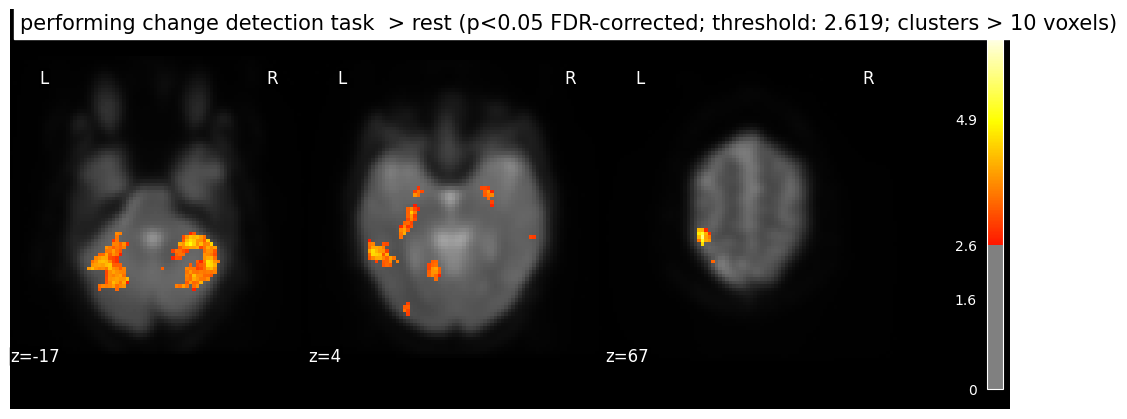

In [17]:
clean_map, threshold = threshold_stats_img(
    z_map,
    alpha=0.05,
    height_control="fdr",
    cluster_threshold=10, # clusters smaller than 10 voxels
    two_sided=False,
)
plot_stat_map(
    clean_map,
    threshold=threshold,
    title=(
        "performing change detection task  > rest "
        f"(p<0.05 FDR-corrected; threshold: {threshold:.3f}; "
        "clusters > 10 voxels)"
    ),
    figure=plt.figure(figsize=(10, 4)),
    **plotting_config,
)
show()

In [18]:
z_map.to_filename(output_dir / "cd_gt_rest_z_map.nii.gz")
eff_map.to_filename(output_dir / "cd_gt_rest_eff_map.nii.gz")

##### Extract positions of significant voxels

In [19]:
from nilearn.reporting import get_clusters_table

table = get_clusters_table(
    z_map, stat_threshold=threshold, cluster_threshold=20
)
table

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,-29.572247,-5.816678,74.057469,6.514537,26859
1,1a,-59.156489,11.933643,37.866693,6.042592,
2,1b,-39.433851,-14.442462,58.315736,5.480300,
3,1c,-29.577182,23.967987,11.243831,5.171979,
4,2,-27.113586,-28.485893,-13.041308,5.595440,16620
5,2a,-44.369589,-23.371150,-15.136552,4.417576,
6,2b,-29.580410,-11.938385,-34.282453,4.416009,
7,2c,-22.184112,-8.026471,-21.427879,4.320877,
8,3,24.653287,-5.769506,-18.741778,5.422067,22696
9,3a,12.328654,-19.057942,-7.269604,5.264200,


In [20]:
table.to_csv(output_dir / "table.csv")

##### F-test, see different conditions and effects

In [21]:
z_map = fmri_glm.compute_contrast(
    activation,
    output_type="z_score",
    stat_type="F",  # set stat_type to 'F' to perform an F test
)

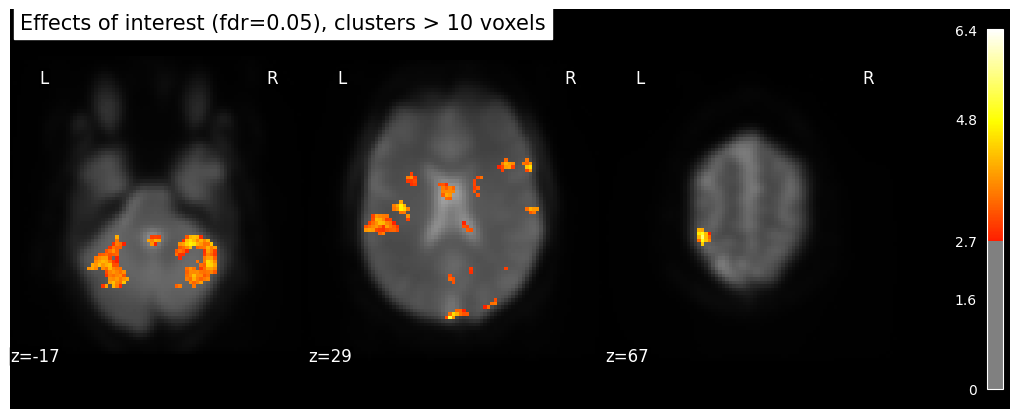

In [22]:
clean_map, threshold = threshold_stats_img(
    z_map,
    alpha=0.05,
    height_control="fdr",
    cluster_threshold=10,
    two_sided=False,
)
plot_stat_map(
    clean_map,
    threshold=threshold,
    title="Effects of interest (fdr=0.05), clusters > 10 voxels",
    figure=plt.figure(figsize=(10, 4)),
    **plotting_config,
)
show()

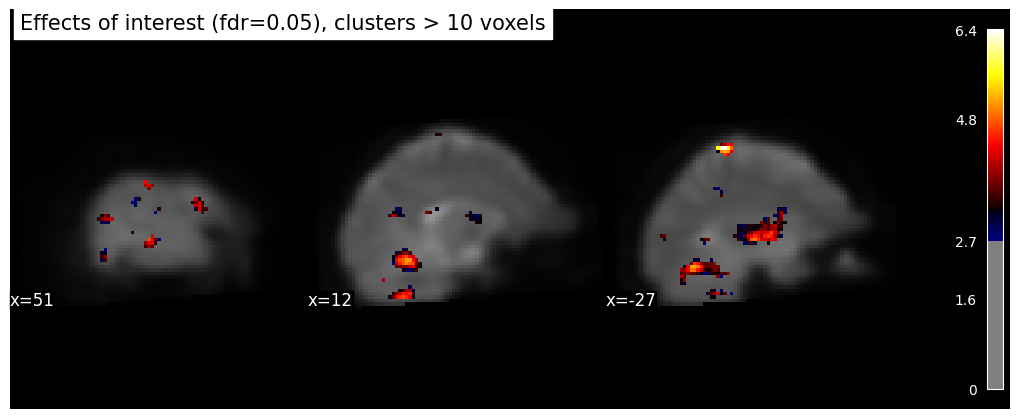

In [23]:
plotting_sag = {
    "bg_img": mean_img,
    "display_mode": "x",
    "cut_coords": 3,
    "black_bg": True,
}

clean_map, threshold = threshold_stats_img(
    z_map,
    alpha=0.05,
    height_control="fdr",
    cluster_threshold=10,
    two_sided=False,
)
plot_stat_map(
    clean_map,
    threshold=threshold,
    title="Effects of interest (fdr=0.05), clusters > 10 voxels",
    figure=plt.figure(figsize=(10, 4)),
    **plotting_sag,
)
show()


Seems like this subject is right-handed, and perhands change detection tasks are more associated with parietal region?

(86, 86, 54, 51)


/Users/jennifer/anaconda3/envs/cse156/lib/python3.10/site-packages/nilearn/plotting/img_plotting.py:1317: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  safe_get_data(stat_map_img, ensure_finite=True),


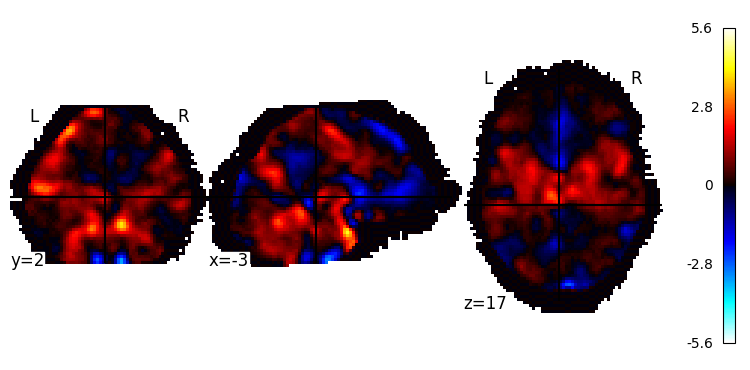

In [24]:
glm01_img = image.load_img('results/GLM1/*.nii')
print(glm01_img.shape)
plotting.plot_stat_map('results/GLM1/beta_0001.nii', bg_img=None)